In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [2]:
df_geo = pd.read_csv('geo_data.txt', sep='\t', header=None,
                     names=['lat', 'lon'])/10000

In [3]:
df_geo.head()

,lat,lon
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437


In [4]:
import mpl_toolkits.basemap as bm

def plot_geo(lat, lon, labels=None):    
    try:
        lllat, lllon = lat.min()-1, lon.max()+1
        urlat, urlon = lat.max()+1, lon.min()-1

        plt.figure(figsize=(10, 10))

        m = bm.Basemap(
            llcrnrlon=lllon,
            llcrnrlat=lllat,
            urcrnrlon=urlon,
            urcrnrlat=urlat, 
            projection='merc',
            resolution='h'
        )

        m.drawcoastlines(linewidth=0.5)
        m.drawmapboundary(fill_color='#47A4C9', zorder=1)
        m.fillcontinents(color='#EBC4D8',lake_color='#47A4C9', zorder=2)

        parallels = np.linspace(lllat, urlat, 10)
        m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
        # draw meridians
        meridians = np.linspace(urlon, lllon, 10)
        m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

        m.scatter(lon, lat, latlon=True, cmap=plt.cm.jet,
              zorder=3, lw=0, c=labels)
    except:
        print('что-то пошло не так')
        plt.scatter(x=lon, y=lat, c=labels, cmap=plt.cm.jet)
        plt.axis('equal')

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


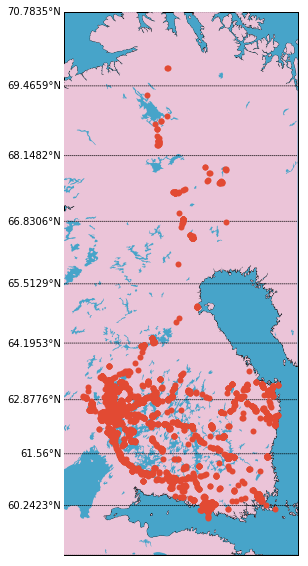

In [5]:
plot_geo(df_geo.lat.values, df_geo.lon.values)

In [6]:
km_in_radian = 6371.0088

In [7]:
from sklearn.neighbors import NearestNeighbors

In [8]:
X = df_geo.values
X = np.radians(X)

In [9]:
X[:10]

array([[1.09254644, 0.51912899],
       [1.09283093, 0.51913073],
       [1.09282744, 0.51915866],
       [1.09258309, 0.51905045],
       [1.09260753, 0.5191255 ],
       [1.09264243, 0.51926687],
       [1.09261451, 0.51913073],
       [1.09262324, 0.51918658],
       [1.09261276, 0.51913073],
       [1.09269828, 0.51920927]])

In [10]:
model = NearestNeighbors(n_neighbors=20, algorithm='ball_tree', metric='haversine')
model.fit(X)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='haversine',
         metric_params=None, n_jobs=1, n_neighbors=20, p=2, radius=1.0)

In [11]:
dist, _ = model.kneighbors(X, n_neighbors=20, return_distance=True)

In [12]:
dist.shape

(13467, 20)

In [13]:
dist = dist[:, -1]

In [14]:
dist = np.sort(dist)

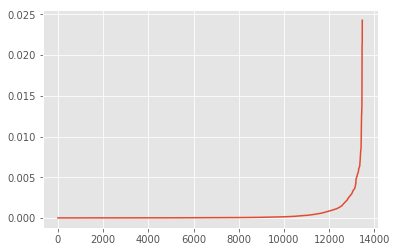

In [15]:
plt.plot(dist)

In [16]:
eps = 0.002

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
dbscan = DBSCAN(eps=eps, min_samples=20, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.002, leaf_size=30, metric='haversine',
    metric_params=None, min_samples=20, n_jobs=1, p=None)

In [19]:
labels = dbscan.labels_

In [20]:
pd.Series(labels).value_counts()

 0     10666
-1       536
 3       329
 10      290
 1       249
 2       162
 5       146
 9       137
 13       93
 16       68
 18       67
 7        59
 22       50
 27       48
 11       44
 6        43
 26       39
 21       37
 17       36
 12       34
 8        33
 14       33
 23       31
 30       28
 25       27
 19       26
 24       25
 29       24
 15       24
 31       22
 4        21
 20       20
 28       20
dtype: int64

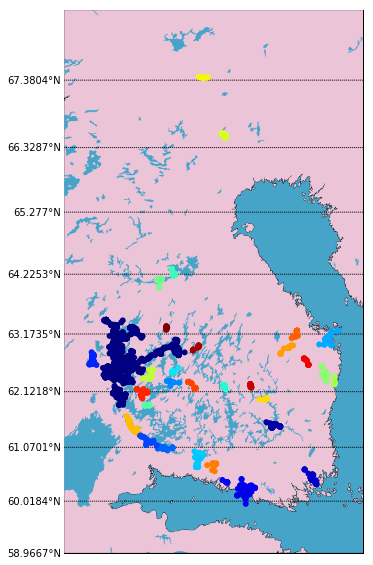

In [22]:
idx = labels!=-1
plot_geo(df_geo.loc[idx, 'lat'].values, 
         df_geo.loc[idx, 'lon'].values, 
         labels=labels[idx])